In [432]:
# Importing Library
import pandas as pd
import numpy as np

# Skicit-Learn Library
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score

# Data Visualization library
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [433]:
# Function to plot the confusion Matrix
# Confusion Matrix func thanks to https://www.kaggle.com/pierra
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [434]:
pokedf = pd.read_csv(r'C:\Users\puter\OneDrive\Desktop\Python\Personal Project\Predict Legendary Pokemon\pokemon.csv')
pokedf = pokedf[[ 'pokedex_number', 'name', 'attack', 'defense',  'hp',
       'sp_attack', 'sp_defense', 'speed','base_total','weight_kg','height_m','capture_rate',
       'generation', 'is_legendary']]
pokedf


,pokedex_number,name,attack,defense,hp,sp_attack,sp_defense,speed,base_total,weight_kg,height_m,capture_rate,generation,is_legendary
0,1,Bulbasaur,49,49,45,65,65,45,318,6.9,0.7,45,1,0
1,2,Ivysaur,62,63,60,80,80,60,405,13.0,1.0,45,1,0
2,3,Venusaur,100,123,80,122,120,80,625,100.0,2.0,45,1,0
3,4,Charmander,52,43,39,60,50,65,309,8.5,0.6,45,1,0
4,5,Charmeleon,64,58,58,80,65,80,405,19.0,1.1,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,101,103,97,107,101,61,570,999.9,9.2,25,7,1
797,798,Kartana,181,131,59,59,31,109,570,0.1,0.3,255,7,1
798,799,Guzzlord,101,53,223,97,53,43,570,888.0,5.5,15,7,1
799,800,Necrozma,107,101,97,127,89,79,600,230.0,2.4,3,7,1


In [435]:
pokedf.tail(20)

,pokedex_number,name,attack,defense,hp,sp_attack,sp_defense,speed,base_total,weight_kg,height_m,capture_rate,generation,is_legendary
781,782,Jangmo-o,55,65,45,45,45,45,300,29.7,0.6,45,7,0
782,783,Hakamo-o,75,90,55,65,70,65,420,47.0,1.2,45,7,0
783,784,Kommo-o,110,125,75,100,105,85,600,78.2,1.6,45,7,0
784,785,Tapu Koko,115,85,70,95,75,130,570,20.5,1.8,3,7,1
785,786,Tapu Lele,85,75,70,130,115,95,570,18.6,1.2,3,7,1
786,787,Tapu Bulu,130,115,70,85,95,75,570,45.5,1.9,3,7,1
787,788,Tapu Fini,75,115,70,95,130,85,570,21.2,1.3,3,7,1
788,789,Cosmog,29,31,43,29,31,37,200,0.1,0.2,45,7,1
789,790,Cosmoem,29,131,43,29,131,37,400,999.9,0.1,45,7,1
790,791,Solgaleo,137,107,137,113,89,97,680,230.0,3.4,45,7,1


In [436]:
pokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  801 non-null    int64  
 1   name            801 non-null    object 
 2   attack          801 non-null    int64  
 3   defense         801 non-null    int64  
 4   hp              801 non-null    int64  
 5   sp_attack       801 non-null    int64  
 6   sp_defense      801 non-null    int64  
 7   speed           801 non-null    int64  
 8   base_total      801 non-null    int64  
 9   weight_kg       781 non-null    float64
 10  height_m        781 non-null    float64
 11  capture_rate    801 non-null    object 
 12  generation      801 non-null    int64  
 13  is_legendary    801 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 87.7+ KB


There's a null value on weight and height feature we need to inspect and impute it. Other problem, capture_rate dtype is an 'object' we want it type as integer. Minior(index=773) have a string capture rate, we need to make it capture rate as normal when it was still with it shell(= 30) and notice how UltraBeast (index 792-798) categorized as Legendary. It is false, announced by the official site itself. Ultra Beasts Pokemon are not a legendary Pokemon.

In [437]:
pokedf.loc[773,'capture_rate']= 30
pokedf.loc[792:798,'is_legendary']= 0
pokedf['capture_rate']= pokedf.capture_rate.astype('str').astype('int')

In [438]:
# Inspect null value

pokedf[pokedf.weight_kg.isnull()]

,pokedex_number,name,attack,defense,hp,sp_attack,sp_defense,speed,base_total,weight_kg,height_m,capture_rate,generation,is_legendary
18,19,Rattata,56,35,30,25,35,72,253,NaN,NaN,255,1,0
19,20,Raticate,71,70,75,40,80,77,413,NaN,NaN,127,1,0
25,26,Raichu,85,50,60,95,85,110,485,NaN,NaN,75,1,0
26,27,Sandshrew,75,90,50,10,35,40,300,NaN,NaN,255,1,0
27,28,Sandslash,100,120,75,25,65,65,450,NaN,NaN,90,1,0
36,37,Vulpix,41,40,38,50,65,65,299,NaN,NaN,190,1,0
37,38,Ninetales,67,75,73,81,100,109,505,NaN,NaN,75,1,0
49,50,Diglett,55,30,10,35,45,90,265,NaN,NaN,255,1,0
50,51,Dugtrio,100,60,35,50,70,110,425,NaN,NaN,50,1,0
51,52,Meowth,35,35,40,50,40,90,290,NaN,NaN,255,1,0


Here we need to deal with the missing data in this case we fill the NaN value with the median of the other value

In [439]:
# Imputing data
pokedf = pokedf.fillna(pokedf.median())

Here we inspect how every feature correlated each other, of course total base have a high correlation with each stats, because total base is a sum from every each of them.

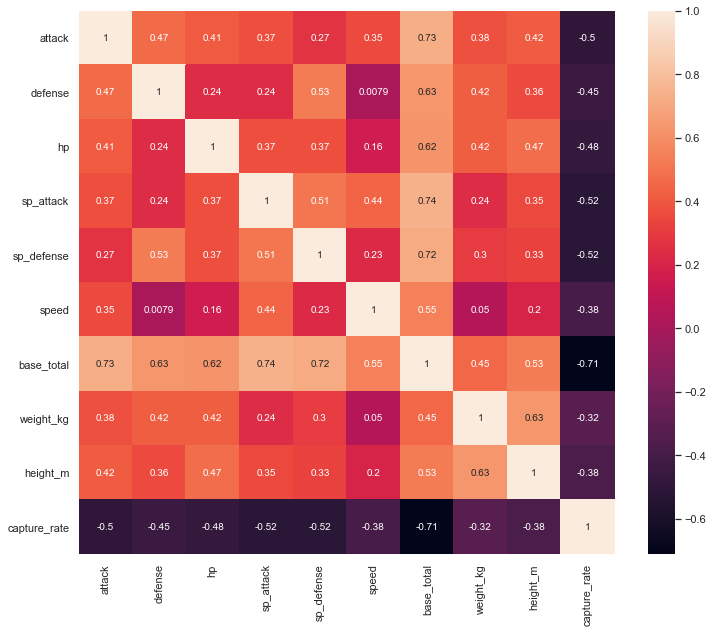

In [440]:
pokecorr=  pokedf[['attack', 'defense',  'hp',
       'sp_attack', 'sp_defense', 'speed','base_total','weight_kg','height_m','capture_rate']].corr()
f,ax = plt.subplots(figsize= (12,10))
sns.heatmap(pokecorr,annot= True)

In [441]:
#Until Generation 7 There is 801 Pokemon(serebii.net) and we need to check for duplicates

print(pokedf.shape)

pokedf.drop_duplicates(subset ="name", 
                     keep = 'first', inplace = True)
print(pokedf.shape)

(801, 14)
(801, 14)


In [442]:
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_palette('colorblind')

Okay Let's see what we got, We will visualize our data and get some insight

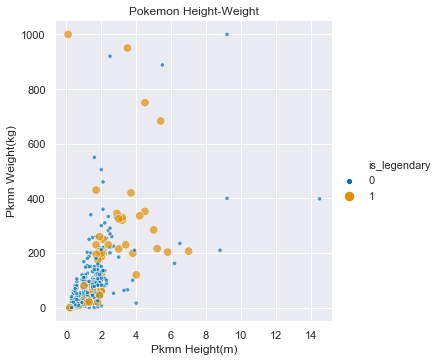

In [443]:
#Plotting Pkmn Weight - Height

g = sns.relplot(kind = 'scatter',data = pokedf, x ='height_m',y='weight_kg',hue='is_legendary',
                size = 'is_legendary',size_order=[1,0],alpha= 0.7)
g.set(xlabel='Pkmn Height(m)',ylabel='Pkmn Weight(kg)',title='Pokemon Height-Weight')
plt.show()

There you can see, legendary Pokemons seem have a big body size and pretty high heavy weight, but not all of them. Some legendary Pokemon have a small size too. If we doesn't notice something like this it might ruin our model.

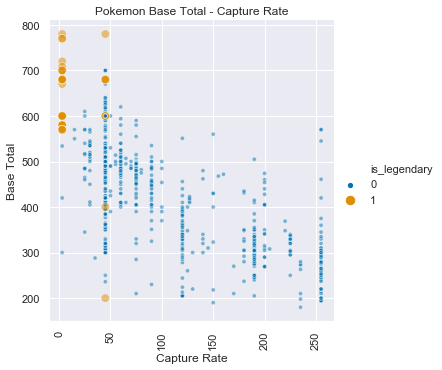

In [444]:
# Plotting Pokemon Base Total - Capture Rate

g = sns.relplot(kind = 'scatter',data = pokedf, x ='capture_rate',y='base_total',hue='is_legendary',size = 'is_legendary',
                size_order=[1,0],alpha= 0.5)
g.set(xlabel='Capture Rate',ylabel='Base Total',title='Pokemon Base Total - Capture Rate')
g.set_xticklabels(rotation=90)
plt.show()

It is legendary Pokemon, it should be hard to get3 it, from the plot we can see how legendary Pokemon have a large stats and low capture rate, of course to make it challenging for us to catch them, but some event Pokemon, giving us legendary Baby Pokemon. We get those low Base Total points from it.

In [445]:
grouped= pokedf.groupby(['generation']).mean()
grouped

,pokedex_number,attack,defense,hp,sp_attack,sp_defense,speed,base_total,weight_kg,height_m,capture_rate,is_legendary
generation,,,,,,,,,,,,
1,76.0,74.529801,70.079470,64.344371,69.403974,67.741722,70.152318,416.251656,43.619205,1.212583,106.185430,0.033113
2,201.5,69.960000,71.790000,70.980000,65.400000,73.440000,61.610000,413.180000,49.105000,1.163000,91.900000,0.060000
3,319.0,77.185185,72.637037,65.666667,71.562963,69.392593,63.577778,420.022222,67.077778,1.229630,113.355556,0.074074
4,440.0,82.672897,76.168224,73.102804,74.635514,74.523364,70.074766,451.177570,76.885047,1.133645,78.859813,0.121495
5,571.5,80.557692,71.961538,70.314103,69.974359,67.711538,66.519231,427.038462,52.402564,1.032051,103.102564,0.083333
6,685.5,76.527778,73.555556,71.111111,76.569444,73.194444,66.652778,437.611111,51.879167,1.091667,100.402778,0.083333
7,761.5,84.637500,78.012500,70.575000,75.250000,75.650000,64.037500,448.162500,97.412500,1.283750,84.512500,0.125000


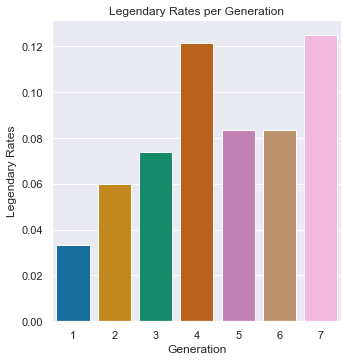

In [446]:
# Legendary Pokemon percentage per Generation

g = sns.catplot(kind ='bar', x =[1,2,3,4,5,6,7], y= 'is_legendary',data = grouped)
g.set(xlabel='Generation',ylabel='Legendary Rates',title='Legendary Rates per Generation')
plt.show()

Here, we can learn about how legendary Pokemon distributed for every region, as we can see, it is usually below than 10% of Pokemon that released on that generation is legendary.

In [447]:
#Preparing Data
X = pokedf[['base_total','weight_kg','height_m','capture_rate']].values
y = pokedf['is_legendary'].values

print("shape of Y :"+str(y.shape))
print("shape of X :"+str(X.shape))

scaler = RobustScaler()
X = scaler.fit_transform(X)

shape of Y :(801,)
shape of X :(801, 4)


Before fitting our data to the model, important for us to split the data into train data and test data. We have train data for fitting it into the model and test data to measure how well is our model. In this case I took 25% of our data into test data adn 75% as train data.

In [448]:
#Splitting data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(y_train.shape))
print("shape of Y Test :"+str(y_test.shape))

shape of X Train :(600, 4)
shape of X Test :(201, 4)
shape of Y Train :(600,)
shape of Y Test :(201,)


Jump into the interesting part. In this project we already saw how our data have some data with extreme outliers. So on my judgement Linear SVM is the right method to build our model. Now we still need to decide our C value, C value tell our SVM model how much we want to neglect our outliers, smaller C give us larger margin.

In [449]:
# Find the best parameter

for this_C in [1,3,5,10,20,40,60,80,100]:
    model = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
    scoretrain = model.score(X_train,y_train)
    scoretest  = model.score(X_test,y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.986667 , Test Score: 0.975124 

Linear SVM value of C:3, training score :0.986667 , Test Score: 0.975124 

Linear SVM value of C:5, training score :0.986667 , Test Score: 0.975124 

Linear SVM value of C:10, training score :0.986667 , Test Score: 0.975124 

Linear SVM value of C:20, training score :0.986667 , Test Score: 0.975124 

Linear SVM value of C:40, training score :0.986667 , Test Score: 0.975124 

Linear SVM value of C:60, training score :0.986667 , Test Score: 0.975124 

Linear SVM value of C:80, training score :0.986667 , Test Score: 0.975124 

Linear SVM value of C:100, training score :0.986667 , Test Score: 0.975124 



In [450]:
# Measuring our model

model = SVC(kernel='linear',C=20) 
model.fit(X_train,y_train)
scores = cross_val_score(model,X_test,y_test,cv=8)
scores.mean()

0.9601923076923077

Now we got our score, but its not enough we need more score to tell how well our model is working. Now we will see the confusion matrix that its produce, confusion matrix show how our model choosing the the class and tell if its goes right or wrong.

In [451]:
y_pred = model.predict(X_test)

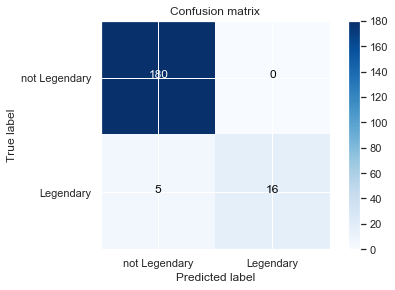

In [452]:
# Plot Confusion Matrix

class_names=np.array(['not Legendary','Legendary'])

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)

Now you already see the confusion matrix, our model guess 16 Pokemon to be legendary and it turns out all fo them are legendary Pokemon, thats cool. And then , our model guess there's 185 Pokemon are classified are not legendary, and suprisingly our model only wrong only 5 samples. They predicted 180 of them are really not legendary Pokemon. Now we will compute our model accuracy and f1 score. F1 score tells us if our model have a high precision and high recall.

In [453]:
acc = accuracy_score(y_test,y_pred)
F1 = f1_score(y_test,y_pred)

print("The accuracy score is: "+ str(acc))
print('The F1 Score is : '+str(F1))

The accuracy score is: 0.9751243781094527
The F1 Score is : 0.8648648648648648
